# Pandas 的主要数据结构
     Series （一维数据）
        Pandas Series 类似表格中的一个列（column），类似于一维数组，可以保存任何数据类型
            pandas.Series( data, index, dtype, name, copy)
                参数：
                    data：一组数据(ndarray 类型)。

                    index：数据索引标签，如果不指定，默认从 0 开始。

                    dtype：数据类型，默认会自己判断。

                    name：设置名称。

                    copy：拷贝数据，默认为 False。
     DataFrame（二维数据）
        DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。
            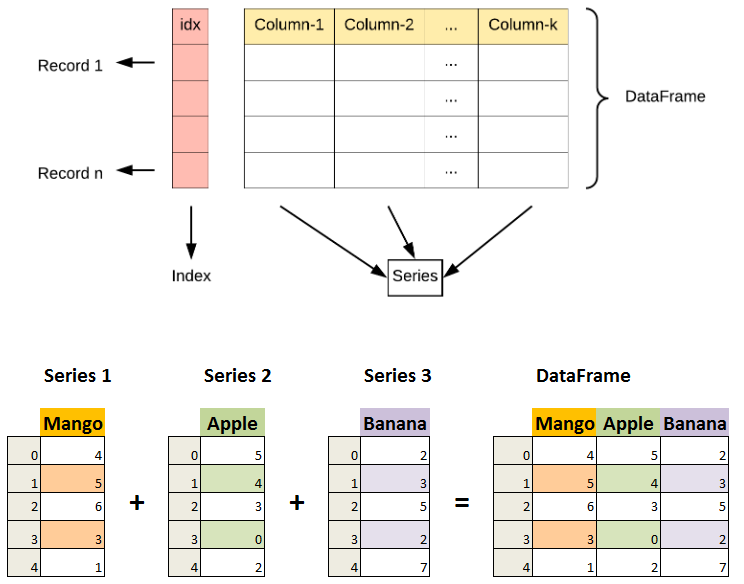
        DataFrame 构造方法如下：
            pandas.DataFrame( data, index, columns, dtype, copy)
                参数说明：

                data：一组数据(ndarray、series, map, lists, dict 等类型)。

                index：索引值，或者可以称为行标签。

                columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 。

                dtype：数据类型。

                copy：拷贝数据，默认为 False。


In [31]:
import pandas as pd

## series数据结构
    使用list,或者字典进行创建，name可以命名整个series结构
索引。和数组索引一样

In [21]:
#series
a = ["Google", "Runoob", "Wiki"]
b={1:"南宫月",2:"萧漪",3:"熏月"}
myvar=pd.Series(a,index=["a","b","c"])#当data为数组时，index将成为行标签
myvar1=pd.Series(b,index=[1,2],name="name")#当data为字典时，index将成为选择区域
print(myvar)
myvar1

a    Google
b    Runoob
c      Wiki
dtype: object


1    南宫月
2     萧漪
Name: name, dtype: object

In [17]:
myvar["b"]#series索引

'Runoob'

## dataframe数据结构
创建
索引：
    可以使用loc返回指定行的数据，如果没有设置索引，第一行索引为 0，第二行索引为 1，以此类推

In [37]:
#dataframe
data = [['Google',10],['Runoob',12],['Wiki',13]]

df = pd.DataFrame(data,columns=['Site','Age'])#设置列标签

print(df)

     Site  Age
0  Google   10
1  Runoob   12
2    Wiki   13


In [50]:
#如果列标签已经存在那么是否列标签会变成索引，如同series一样,行标签也一样，没有对应的部分为NaN
# df
df1=pd.DataFrame(df,index=[1,2,6],columns=["Site"])
df1

,Site
1,Runoob
2,Wiki
6,NaN


In [65]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]#成员为字典的列表类型
data1 = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}                                                   #成员值为列表的字典

data2 = [["name","age"],['Google',10],['Runoob',12],['Wiki',13]]   #成员为列表的列表


In [67]:
print(data)
print(pd.DataFrame(data))
print(data1)
print(pd.DataFrame(data1))
print(data2)
print(pd.DataFrame(data2,columns=["name","age"]))#行列标签只属于检索以及检索没有该标签时创建

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
   a   b     c
0  1   2   NaN
1  5  10  20.0
{'calories': [420, 380, 390], 'duration': [50, 40, 45]}
   calories  duration
0       420        50
1       380        40
2       390        45
[['name', 'age'], ['Google', 10], ['Runoob', 12], ['Wiki', 13]]
     name  age
0    name  age
1  Google   10
2  Runoob   12
3    Wiki   13


In [76]:
#数据载入到dataframe对象
df=pd.DataFrame(data1)
#返回第一行
print(df.loc[0])#返回结果其实就是一个 Pandas Series 数据。
print()
#返回第一行和第二行 也可以返回多行数据，使用 [[ ... ]] 格式，... 为各行的索引，以逗号隔开：
print(df.loc[[0,1]])#返回结果其实就是一个 Pandas DataFrame 数据

calories    420
duration     50
Name: 0, dtype: int64

   calories  duration
0       420        50
1       380        40


获取dataframe中的其中几列

In [78]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56]
}
df = pd.DataFrame(data)
print(df)

   mango  apple  pear  banana
0    420     50     1      23
1    380     40     2      45
2    390     45     3      56


假设我们只关注 apple 和 banana 的数据时，可以使用以下方法：即通过类似下标索引的方式
    两层括号可以直接把列标标出来，一层无法标出列标，而且只能取其中一列

In [87]:
print(df[["apple","banana"]])
print(df[["mango"]])
# print(df["apple","banana"])会出现错误

   apple  banana
0     50      23
1     40      45
2     45      56
   mango
0    420
1    380
2    390


补充一下，如何先添加新列。添加一新列，名字为sum，每行的总和。

In [90]:
data = {
  "mango": [420, 380, 390],
  "apple": [50, 40, 45],
  "pear": [1, 2, 3],
  "banana": [23, 45,56]
}
df = pd.DataFrame(data)
df['sum']=df['mango']+df['apple']+df['pear']+df['banana']#添加一个新列
df

,mango,apple,pear,banana,sum
0,420,50,1,23,494
1,380,40,2,45,467
2,390,45,3,56,494


In [98]:
df["name"]=["data1","data2","data3"]#创建一个新的列
df1=df.set_index(["name"])#这行代码的作用是将DataFrame对象df按照name列的值进行索引，即将name列设置为df的索引。
df1

,mango,apple,pear,banana,sum
name,,,,,
data1,420,50,1,23,494
data2,380,40,2,45,467
data3,390,45,3,56,494


In [114]:
df1.loc["data1"]
df1.loc["data2","mango"]#行列索引
df1.loc["data2","mango"]=390#修改某一个值
array=df1.loc["data1"]
df1.loc["data1"]=400#修改行的值
df1

,mango,apple,pear,banana,sum
name,,,,,
data1,400,400,400,400,400
data2,390,40,2,45,467
data3,390,45,3,56,494
